In [1]:
import csv
#numpy and panda for data structure
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%matplotlib inline
import cv2
import time
import itertools
from tslearn.metrics import dtw_path_from_metric
import seaborn as sns
from mpl_toolkits import mplot3d
import operator
import math

import warnings
warnings.filterwarnings('ignore')

In this notebook, all PIDs are matched. 

### Load survey data (PID ordered)

In [5]:
survey_results = pd.read_csv("./results/cleaned_survey.csv")

In [6]:
survey_results.head(1)

,PID,comment,mask,Sound,dialog_ID,ScoreMemTest,MemConfidence,ScoreCompTest,CompConfidence,PostSpeakerIdent,PostOverallComprehension,PostConcentration,PostPresence,PostAudioHelp
0,7,- J'ai pas trop aimé que les intervenantes cha...,no,mono,2,4,4,3,5,3,4,2,2,4


### Load eye tracking related data (PID not ordered yet)

In [37]:
# For eye tracking data PID sequence is as follows:
PID_eyetracking = [0, 21, 22, 28, 35, 36, 23, 7, 1, 2, 37, 24, 38, 14, 15, 16, 39, 8,
       17, 9, 10, 25, 40, 41, 18, 3, 4, 11, 12, 19, 29, 13, 20, 30, 26,
       27, 5, 31, 32, 33, 6, 34]

fixation

In [38]:
nb_fixation = pd.read_csv("./results/fixations/nb_fixation.csv")

In [39]:
mean_fix_duration = pd.read_csv("./results/fixations/participant_mean_fix_duration_original_all.csv")

In [40]:
total_fix_duration = pd.read_csv("./results/fixations/total_fix_duration.csv")

In [41]:
fixation_points_per_participant_per_frame = pd.read_pickle(r'fixation_points_per_participant_per_frame.pkl')

saccade

In [42]:
mean_saccade_amplitude = pd.read_csv("./results/saccade/participant_mean_saccade_amplitude_original_all.csv")

scanpath

In [43]:
# participant scanpath in fixation domain
long_scanpaths = pd.read_csv("./results/scanpaths/long_scanpaths.csv")

In [44]:
long_scanpaths.head()

,dialog1_normal_mask,dialog2_head_mask,dialog3_spatial,dialog4_head,dialog5_spatial_mask,dialog6_normal
0,eFeReeeLLLLLLeLLFLLeeRRFLLLFFFFLLLeeeeFeeeFeLL...,FFLReLLeeLeeeFeFeFLLFFLLLLLLLeRFFFFFFFFeeReeRR...,FFFFLeeeeeeeLeFFFFFFLLLLLLLLLLRFFRRReRReFFFFFF...,FFRRRLFRReReeeRLLLLeeeeeFFeeFFFFFFRRRRRRRRRRRR...,FeFRRRLLFFRReRFFReRRRRRReeRFFFFRRRLFFFFFFFFFFL...,FeRFLFFFeeeeFeeFFFFeeLeeeeeeeeeeeReeLeeLFFeeFF...
1,FFFLLLLFLRRLLLLLLLLLLLLLLLeeeeLLLLLLLLLLLLLLee...,FeeeeeeeeeeeeeeeeeeeeLeeeeeeeeeeeeeeeeeeeeeeee...,eFLLLeeFFFFFFFFFFFFFFFFFFFFFeeFeeeeLLLLeLeeeee...,FRRRRReeLeeReReeeeRFReeeeeeeReeRLLLLLLeeLLLeFF...,eFFRRRRLFRRRRRRRRRRRRReeeeeeeReeeeeReeeeRRRRRR...,FeRFeFeeeeeeeeeeeFFeeeeFFFeeFFRReeeeeFeLLLLLLL...
2,eeeeRRRRRLLeLeLLLLLLLeLLLeeeLeRRLLLLLeLeeeeFee...,FFLLLFFFFRLLLLLLLLRRFFLLLLLLeeeLeeeFRRReRRRRRe...,eFFFFFFFeLLRReeeRReFFFLeLeeeeeeeeeFLLLLLLLLLLL...,eFFFeLeLLLFFFReeeeeeeeeeeRRRReeReLLLLLLLLLeFFF...,FLeRReeRRReReRReeeReeeeRRRRRRReRRRReRRRFFFFeFe...,eeFFFReFFFeFeeeeeeeRReeeFFFLLeFFFeReFeeFFeLeRR...
3,LeLeLLLFRLLLeeeeeeLLLLLLLLLeeeLeeeeLLLLeeLFFFF...,eFFRFFFFRRLLLLLFRLLeFLLLLLFeeLLLLLLFeRRRRRRRRR...,FFFeeeReeeeeeFFFeReeeLeeLeLLLReeeRRRReRReeeeLe...,RRRLLLeFReeeReFRRFFeLRRRReLLLRRFRLLFeFFFFFFeFF...,RRFFRRRReeeeRReeeRRReeeRRRReFFeFeeeFFFFRFeeFFL...,FFFFFFeFLeFeeeFFFFeeeeeeeeFReeReReeReeeeeeeeeR...
4,eeRRLeReeeeeLLeLLLLLLFRRRLLLLLLLeeeeReFeFFFeee...,FFFFFRFeRFRRFFLFFFLLRFRFFLeFFRFRReeeeeLLeeFeFe...,eeeeeeLRReeeeeLReeeFRLeeeeeeeFeFLLLLeRRReRReeR...,eeeLeeeeeeeLeeeeeeeeeeLeLeeeeeeLeeeeeeLeeLRLeL...,FFFLLRRRRRReRRReeeeeeeeRRRRRReeReFeFeFeFeeeeee...,eeeLeeeFeFeeFFFeFeeeeeeeeFeReFeRLFRRRRRRRFRRRR...


In [45]:
short_scanpaths = pd.read_csv("./results/scanpaths/short_scanpaths.csv")

In [46]:
short_scanpaths.iloc[1, 3]

'FReLeReReRFReReRLeLeFLeFeLeFeLeReReLeLeLeLeLFeFeFeFRLeLeLFLeLeLFRFLeFRFeFeRFRFLeLRFeFL'

In [47]:
mean_dissimilarity = pd.read_csv("./results/scanpaths/mean_dissimilarity.csv")

In [48]:
ratio_aoi_transitions = pd.read_csv("./results/scanpaths/ratio_aoi_transitions.csv")

### Consolidate survey and eyetracking matrix for participants

In [49]:
nb_fixation.columns

Index(['dialog1_normal_mask', 'dialog2_head_mask', 'dialog3_spatial',
       'dialog4_head', 'dialog5_spatial_mask', 'dialog6_normal'],
      dtype='object')

In [50]:
mean_fix_duration.iloc[1, 1]

187.84758364312268

In [74]:
mean_fix_duration.tail()

,dialog1_normal_mask,dialog2_head_mask,dialog3_spatial,dialog4_head,dialog5_spatial_mask,dialog6_normal
37,162.813889,166.067138,170.164706,157.650000,166.306604,163.158824
38,206.108861,190.389831,204.982609,179.055762,208.119534,223.811966
39,150.159011,150.512397,154.440860,162.217742,147.613383,148.988593
40,163.451429,162.922222,179.820122,180.476923,173.990033,181.401760
41,185.362637,177.435374,164.430000,179.253846,159.212454,161.601307


In [101]:
mean_dissimilarity.head()

,dialog1_normal_mask,dialog2_head_mask,dialog3_spatial,dialog4_head,dialog5_spatial_mask,dialog6_normal
0,80.585366,64.414634,63.097561,60.902439,59.780488,73.000000
1,108.170732,103.097561,89.634146,103.853659,98.292683,79.292683
2,122.853659,105.317073,101.219512,120.121951,96.487805,121.073171
3,82.560976,115.487805,68.463415,67.000000,72.292683,94.317073
4,112.902439,78.170732,107.195122,106.512195,78.804878,83.317073


In [102]:
# mean_dissimilarity.iloc[:, 5]

In [75]:
all_measures.PID.unique()

array([ 7,  8,  9, 10, 11, 12, 13,  0,  1,  2,  3,  4,  5,  6, 28, 29, 30,
       31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 21, 22, 23, 24, 25, 26,
       27, 14, 15, 16, 17, 18, 19, 20])

In [91]:
all_measures = survey_results.copy()

In [113]:
# Patch the mistake!
all_measures.loc[(all_measures['mask'] == 'yes') & (all_measures.Sound == 'mono'), 'dialog_ID'] = 1
all_measures.loc[(all_measures['mask'] == 'yes') & (all_measures.Sound == 'head'), 'dialog_ID'] = 2
all_measures.loc[(all_measures['mask'] == 'no') & (all_measures.Sound == 'binaural'), 'dialog_ID'] = 3
all_measures.loc[(all_measures['mask'] == 'no') & (all_measures.Sound == 'head'), 'dialog_ID'] = 4
all_measures.loc[(all_measures['mask'] == 'yes') & (all_measures.Sound == 'binaural'), 'dialog_ID'] = 5
all_measures.loc[(all_measures['mask'] == 'no') & (all_measures.Sound == 'mono'), 'dialog_ID'] = 6

In [124]:
all_measures.columns

Index(['PID', 'P_name', 'comment', 'mask', 'Sound', 'dialog_ID',
       'ScoreMemTest', 'MemConfidence', 'ScoreCompTest', 'CompConfidence',
       'PostSpeakerIdent', 'PostOverallComprehension', 'PostConcentration',
       'PostPresence', 'PostAudioHelp', 'nb_fixation', 'mean_fix_duration',
       'total_fix_duration', 'mean_saccade_amplitude', 'long_scanpaths',
       'short_scanpaths', 'mean_dissimilarity', 'ratio_aoi_transitions'],
      dtype='object')

In [115]:
# for dlg_id in range(1,7): # loop through dialogs
#     count_line = 0
#     for pid in PID_eyetracking: # loop through participants
#         try:
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'nb_fixation'] = nb_fixation.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'mean_fix_duration'] = mean_fix_duration.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'total_fix_duration'] = total_fix_duration.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'mean_saccade_amplitude'] = mean_saccade_amplitude.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'long_scanpaths'] = long_scanpaths.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'short_scanpaths'] = short_scanpaths.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'mean_dissimilarity'] = mean_dissimilarity.iloc[count_line, dlg_id-1]
#             all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'ratio_aoi_transitions'] = ratio_aoi_transitions.iloc[count_line, dlg_id-1]
#             count_line = count_line + 1
#         except:
#             print("line: " + str(count_line) + ", dialog: " + str(dlg_id))
            
### in fact the eye tracking data is already organized per participant ID             
for dlg_id in range(1,7): # loop through dialogs
    for pid in range(0,42): # loop through participants
        try:
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'nb_fixation'] = nb_fixation.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'mean_fix_duration'] = mean_fix_duration.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'total_fix_duration'] = total_fix_duration.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'mean_saccade_amplitude'] = mean_saccade_amplitude.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'long_scanpaths'] = long_scanpaths.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'short_scanpaths'] = short_scanpaths.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'mean_dissimilarity'] = mean_dissimilarity.iloc[pid, dlg_id-1]
            all_measures.loc[(all_measures.PID == pid) & (all_measures.dialog_ID == dlg_id), 'ratio_aoi_transitions'] = ratio_aoi_transitions.iloc[pid, dlg_id-1]
        except:
            print("line: " + str(count_line) + ", dialog: " + str(dlg_id))

In [88]:
all_measures[all_measures.short_scanpaths.isnull()]

,PID,P_name,comment,mask,Sound,dialog_ID,ScoreMemTest,MemConfidence,ScoreCompTest,CompConfidence,...,PostPresence,PostAudioHelp,nb_fixation,mean_fix_duration,total_fix_duration,mean_saccade_amplitude,long_scanpaths,short_scanpaths,mean_dissimilarity,ratio_aoi_transitions


In [57]:
all_measures.dialog_ID.unique()

array([2, 1, 4, 3, 6, 5])

In [58]:
all_measures['dialog_ID'].value_counts()

6    42
5    42
4    42
3    42
2    42
1    42
Name: dialog_ID, dtype: int64

In [59]:
all_measures['Sound'].value_counts()

binaural    84
mono        84
head        84
Name: Sound, dtype: int64

In [60]:
## Patch the mistake! - actually the mistake is in the dialog_id
# all_measures.loc[all_measures.dialog_ID == 1, 'mask'] = 'yes'
# all_measures.loc[all_measures.dialog_ID == 1, 'Sound'] = 'mono'

# all_measures.loc[all_measures.dialog_ID == 2, 'mask'] = 'yes'
# all_measures.loc[all_measures.dialog_ID == 2, 'Sound'] = 'head'

# all_measures.loc[all_measures.dialog_ID == 3, 'mask'] = 'no'
# all_measures.loc[all_measures.dialog_ID == 3, 'Sound'] = 'binaural'

# all_measures.loc[all_measures.dialog_ID == 4, 'mask'] = 'no'
# all_measures.loc[all_measures.dialog_ID == 4, 'Sound'] = 'head'

# all_measures.loc[all_measures.dialog_ID == 5, 'mask'] = 'yes'
# all_measures.loc[all_measures.dialog_ID == 5, 'Sound'] = 'binaural'

# all_measures.loc[all_measures.dialog_ID == 6, 'mask'] = 'no'
# all_measures.loc[all_measures.dialog_ID == 6, 'Sound'] = 'mono'

In [62]:
all_measures['mask'].unique()

array(['no', 'yes'], dtype=object)

In [63]:
all_measures['Sound'].unique()

array(['mono', 'binaural', 'head'], dtype=object)

In [120]:
all_measures.groupby('mask')['ScoreMemTest', 'MemConfidence', 'ScoreCompTest', 'CompConfidence',
       'PostSpeakerIdent', 'PostOverallComprehension', 'PostConcentration',
       'PostPresence', 'PostAudioHelp', 'nb_fixation', 'mean_fix_duration',
       'total_fix_duration', 'mean_saccade_amplitude', 'long_scanpaths',
       'short_scanpaths', 'mean_dissimilarity', 'ratio_aoi_transitions'].mean().T

mask,no,yes
ScoreMemTest,4.222222,4.642857
MemConfidence,3.293651,3.269841
ScoreCompTest,2.619048,2.507937
CompConfidence,3.817460,3.603175
PostSpeakerIdent,4.238095,3.269841
PostOverallComprehension,3.753968,3.642857
PostConcentration,2.428571,3.246032
PostPresence,3.095238,2.634921
PostAudioHelp,3.150794,3.261905
nb_fixation,0.002395,0.002377


In [121]:
all_measures.groupby('mask')['ScoreMemTest', 'MemConfidence', 'ScoreCompTest', 'CompConfidence',
       'PostSpeakerIdent', 'PostOverallComprehension', 'PostConcentration',
       'PostPresence', 'PostAudioHelp', 'nb_fixation', 'mean_fix_duration',
       'total_fix_duration', 'mean_saccade_amplitude', 'long_scanpaths',
       'short_scanpaths', 'mean_dissimilarity', 'ratio_aoi_transitions'].std().T

mask,no,yes
ScoreMemTest,1.238637,1.388319
MemConfidence,1.117622,1.215978
ScoreCompTest,0.577680,0.701382
CompConfidence,1.022943,1.277994
PostSpeakerIdent,0.804274,1.091148
PostOverallComprehension,0.864282,1.015593
PostConcentration,0.941731,0.900547
PostPresence,1.061535,1.000825
PostAudioHelp,1.051228,1.059650
nb_fixation,0.000288,0.000290


In [122]:
all_measures.groupby('Sound')['ScoreMemTest', 'MemConfidence', 'ScoreCompTest', 'CompConfidence',
       'PostSpeakerIdent', 'PostOverallComprehension', 'PostConcentration',
       'PostPresence', 'PostAudioHelp', 'nb_fixation', 'mean_fix_duration',
       'total_fix_duration', 'mean_saccade_amplitude', 'long_scanpaths',
       'short_scanpaths', 'mean_dissimilarity', 'ratio_aoi_transitions'].mean().T

Sound,binaural,head,mono
ScoreMemTest,4.535714,4.416667,4.345238
MemConfidence,3.071429,3.380952,3.392857
ScoreCompTest,2.488095,2.857143,2.345238
CompConfidence,3.297619,4.190476,3.642857
PostSpeakerIdent,4.047619,3.511905,3.702381
PostOverallComprehension,3.547619,3.821429,3.726190
PostConcentration,2.690476,3.095238,2.726190
PostPresence,2.928571,2.845238,2.821429
PostAudioHelp,3.452381,2.833333,3.333333
nb_fixation,0.002364,0.002416,0.002377


In [123]:
all_measures.groupby('Sound')['ScoreMemTest', 'MemConfidence', 'ScoreCompTest', 'CompConfidence',
       'PostSpeakerIdent', 'PostOverallComprehension', 'PostConcentration',
       'PostPresence', 'PostAudioHelp', 'nb_fixation', 'mean_fix_duration',
       'total_fix_duration', 'mean_saccade_amplitude', 'long_scanpaths',
       'short_scanpaths', 'mean_dissimilarity', 'ratio_aoi_transitions'].std().T

Sound,binaural,head,mono
ScoreMemTest,1.236458,1.363980,1.392701
MemConfidence,1.061775,1.260185,1.151404
ScoreCompTest,0.702732,0.414870,0.667563
CompConfidence,1.249383,1.046810,1.001720
PostSpeakerIdent,1.004865,1.092075,1.061708
PostOverallComprehension,1.057444,0.866522,0.882919
PostConcentration,0.981469,1.048453,0.948698
PostPresence,1.127805,1.035445,1.007929
PostAudioHelp,1.102076,1.050913,0.909565
nb_fixation,0.000303,0.000266,0.000297


In [68]:
all_measures.columns

Index(['PID', 'P_name', 'comment', 'mask', 'Sound', 'dialog_ID',
       'ScoreMemTest', 'MemConfidence', 'ScoreCompTest', 'CompConfidence',
       'PostSpeakerIdent', 'PostOverallComprehension', 'PostConcentration',
       'PostPresence', 'PostAudioHelp', 'nb_fixation', 'mean_fix_duration',
       'total_fix_duration', 'mean_saccade_amplitude', 'long_scanpaths',
       'short_scanpaths', 'mean_dissimilarity', 'ratio_aoi_transitions'],
      dtype='object')

Other eye-tracking DVs: 
    - mean dispersion per frame (dispersion of fixation points)
    - mean dispersion per window at transitions 
    - mean dispersion per window at interruptions
Dispersion was not calculated per participant, so it is not included in the analysis at the moment. Don't know if it makes sense to calculate dispersion per participant (against all other participants, per frame/window) as a parameter. Need to verify with the literature as Loic didn't do this. 

In [118]:
all_measures.to_pickle("all_measures_per_participant.pkl")

In [119]:
all_measures = pd.read_pickle("all_measures_per_participant.pkl")

In [117]:
all_measures.to_csv("all_measures_per_participant_patche3.csv")

In [562]:
all_measures.ScoreMemTest.max()

6

In [ ]:
all_measures.col

Transform dispersion data

In [556]:
mean_dispersion_new = pd.read_csv("./results/mean_dispersion_new.csv")
mean_dispersion_all_transitions_new = pd.read_csv("./results/mean_dispersion_all_transitions_new.csv")
mean_dispersion_interruption_new = pd.read_csv("./results/mean_dispersion_interruption_new.csv")

In [491]:
mean_dispersion_new.head()

,mono_mask,head_mask,spatial,head,spatial_mask,mono
0,31.544690,14.97867701,34.36515966,72.9451849,11.81565527,51.35620938
1,15.079422,10.07989333,16.11748546,15.94589284,19.04055991,10.93481339
2,12.120748,7.438059569,9.149039514,14.37228189,12.9598253,7.803141692
3,9.178535,6.726427557,8.738335758,13.58017756,12.29246794,8.056140011
4,9.012362,5.738550857,8.160852395,12.05228947,11.96003585,6.39662352


In [541]:
mean_dispersion[mean_dispersion.Sound == 'binaural']

,mean_dispersion,mask,Sound
0,51.356209,no,binaural
1,10.934813,no,binaural
2,7.803142,no,binaural
3,8.056140,no,binaural
4,6.396624,no,binaural
...,...,...,...
3249,21.204154,yes,binaural
3250,23.981376,yes,binaural
3251,24.028419,yes,binaural
3252,22.897285,yes,binaural


In [542]:
for col in mean_dispersion_new.columns:
    if col == 'mono_mask':
        mean_dispersion = mean_dispersion_new[mean_dispersion_new[col] !=" "][[col]]
        mean_dispersion['mask'] = 'yes'
        mean_dispersion['Sound'] = 'mono'
        mean_dispersion.columns = ['mean_dispersion', 'mask','Sound']
    elif col == 'head_mask':
        df = mean_dispersion_new[mean_dispersion_new[col] !=" "][[col]]
        df['mask'] = 'yes'
        df['Sound'] = 'head'
        df.columns = ['mean_dispersion', 'mask','Sound']
        mean_dispersion = mean_dispersion.append(df)
    elif col == 'spatial':
        df = mean_dispersion_new[mean_dispersion_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'binaural'
        df.columns = ['mean_dispersion', 'mask','Sound']
        mean_dispersion = mean_dispersion.append(df)
    elif col == 'head':
        df = mean_dispersion_new[mean_dispersion_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'head'
        df.columns = ['mean_dispersion', 'mask','Sound']
        mean_dispersion = mean_dispersion.append(df)
    elif col == 'spatial_mask':
        df = mean_dispersion_new[mean_dispersion_new[col] !=" "][[col]]
        df['mask'] = 'yes'
        df['Sound'] = 'binaural'
        df.columns = ['mean_dispersion', 'mask','Sound']
        mean_dispersion = mean_dispersion.append(df)
    elif col == 'mono':
        df = mean_dispersion_new[mean_dispersion_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'mono'
        df.columns = ['mean_dispersion', 'mask','Sound']
        mean_dispersion = mean_dispersion.append(df)
    else:
        print("error")
mean_dispersion['mean_dispersion'] = pd.to_numeric(df['mean_dispersion'],errors = 'coerce')
        

In [547]:
print(mean_dispersion.groupby('mask')['mean_dispersion'].mean().T)
print(mean_dispersion.groupby('mask')['mean_dispersion'].std().T)
print(mean_dispersion.groupby('Sound')['mean_dispersion'].mean().T)
print(mean_dispersion.groupby('Sound')['mean_dispersion'].std().T)

mask
no     14.481805
yes    14.590462
Name: mean_dispersion, dtype: float64
mask
no     6.369241
yes    6.451730
Name: mean_dispersion, dtype: float64
Sound
binaural    14.525594
head        14.515028
mono        14.564533
Name: mean_dispersion, dtype: float64
Sound
binaural    6.426504
head        6.426086
mono        6.384959
Name: mean_dispersion, dtype: float64


In [552]:
mean_dispersion.to_csv("mean_dispersion.csv", index = False)

In [548]:
for col in mean_dispersion_all_transitions_new.columns:
    if col == 'mono_mask':
        mean_dispersion_all_transitions = mean_dispersion_all_transitions_new[mean_dispersion_all_transitions_new[col] !=" "][[col]]
        mean_dispersion_all_transitions['mask'] = 'yes'
        mean_dispersion_all_transitions['Sound'] = 'mono'
        mean_dispersion_all_transitions.columns = ['mean_dispersion_all_transitions', 'mask','Sound']
    elif col == 'head_mask':
        df = mean_dispersion_all_transitions_new[mean_dispersion_all_transitions_new[col] !=" "][[col]]
        df['mask'] = 'yes'
        df['Sound'] = 'head'
        df.columns = ['mean_dispersion_all_transitions', 'mask','Sound']
        mean_dispersion_all_transitions = mean_dispersion_all_transitions.append(df)
    elif col == 'spatial':
        df = mean_dispersion_all_transitions_new[mean_dispersion_all_transitions_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'binaural'
        df.columns = ['mean_dispersion_all_transitions', 'mask','Sound']
        mean_dispersion_all_transitions = mean_dispersion_all_transitions.append(df)
    elif col == 'head':
        df = mean_dispersion_all_transitions_new[mean_dispersion_all_transitions_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'head'
        df.columns = ['mean_dispersion_all_transitions', 'mask','Sound']
        mean_dispersion_all_transitions = mean_dispersion_all_transitions.append(df)
    elif col == 'spatial_mask':
        df = mean_dispersion_all_transitions_new[mean_dispersion_all_transitions_new[col] !=" "][[col]]
        df['mask'] = 'yes'
        df['Sound'] = 'binaural'
        df.columns = ['mean_dispersion_all_transitions', 'mask','Sound']
        mean_dispersion_all_transitions = mean_dispersion_all_transitions.append(df)
    elif col == 'mono':
        df = mean_dispersion_all_transitions_new[mean_dispersion_all_transitions_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'mono'
        df.columns = ['mean_dispersion_all_transitions', 'mask','Sound']
        mean_dispersion_all_transitions = mean_dispersion_all_transitions.append(df)
    else:
        print("error")
mean_dispersion_all_transitions['mean_dispersion_all_transitions'] = pd.to_numeric(df['mean_dispersion_all_transitions'],errors = 'coerce')
        
print(mean_dispersion_all_transitions.groupby('mask')['mean_dispersion_all_transitions'].mean().T)
print(mean_dispersion_all_transitions.groupby('mask')['mean_dispersion_all_transitions'].std().T)
print(mean_dispersion_all_transitions.groupby('Sound')['mean_dispersion_all_transitions'].mean().T)
print(mean_dispersion_all_transitions.groupby('Sound')['mean_dispersion_all_transitions'].std().T)

mask
no     15.665718
yes    15.686313
Name: mean_dispersion_all_transitions, dtype: float64
mask
no     2.654992
yes    2.728477
Name: mean_dispersion_all_transitions, dtype: float64
Sound
binaural    15.643907
head        15.678048
mono        15.705252
Name: mean_dispersion_all_transitions, dtype: float64
Sound
binaural    2.712920
head        2.643144
mono        2.747986
Name: mean_dispersion_all_transitions, dtype: float64


In [553]:
mean_dispersion_all_transitions.to_csv("mean_dispersion_all_transitions.csv", index = False)

In [557]:
for col in mean_dispersion_interruption_new.columns:
    if col == 'mono_mask':
        mean_dispersion_interruption = mean_dispersion_interruption_new[mean_dispersion_interruption_new[col] !=" "][[col]]
        mean_dispersion_interruption['mask'] = 'yes'
        mean_dispersion_interruption['Sound'] = 'mono'
        mean_dispersion_interruption.columns = ['mean_dispersion_interruption', 'mask','Sound']
    elif col == 'head_mask':
        df = mean_dispersion_interruption_new[mean_dispersion_interruption_new[col] !=" "][[col]]
        df['mask'] = 'yes'
        df['Sound'] = 'head'
        df.columns = ['mean_dispersion_interruption', 'mask','Sound']
        mean_dispersion_interruption = mean_dispersion_interruption.append(df)
    elif col == 'spatial':
        df = mean_dispersion_interruption_new[mean_dispersion_interruption_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'binaural'
        df.columns = ['mean_dispersion_interruption', 'mask','Sound']
        mean_dispersion_interruption = mean_dispersion_interruption.append(df)
    elif col == 'head':
        df = mean_dispersion_interruption_new[mean_dispersion_interruption_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'head'
        df.columns = ['mean_dispersion_interruption', 'mask','Sound']
        mean_dispersion_interruption = mean_dispersion_interruption.append(df)
    elif col == 'spatial_mask':
        df = mean_dispersion_interruption_new[mean_dispersion_interruption_new[col] !=" "][[col]]
        df['mask'] = 'yes'
        df['Sound'] = 'binaural'
        df.columns = ['mean_dispersion_interruption', 'mask','Sound']
        mean_dispersion_interruption = mean_dispersion_interruption.append(df)
    elif col == 'mono':
        df = mean_dispersion_interruption_new[mean_dispersion_interruption_new[col] !=" "][[col]]
        df['mask'] = 'no'
        df['Sound'] = 'mono'
        df.columns = ['mean_dispersion_interruption', 'mask','Sound']
        mean_dispersion_interruption = mean_dispersion_interruption.append(df)
    else:
        print("error")
mean_dispersion_interruption['mean_dispersion_interruption'] = pd.to_numeric(df['mean_dispersion_interruption'],errors = 'coerce')
        
print(mean_dispersion_interruption.groupby('mask')['mean_dispersion_interruption'].mean().T)
print(mean_dispersion_interruption.groupby('mask')['mean_dispersion_interruption'].std().T)
print(mean_dispersion_interruption.groupby('Sound')['mean_dispersion_interruption'].mean().T)
print(mean_dispersion_interruption.groupby('Sound')['mean_dispersion_interruption'].std().T)

mask
no     15.898706
yes    16.054101
Name: mean_dispersion_interruption, dtype: float64
mask
no     4.108529
yes    4.249273
Name: mean_dispersion_interruption, dtype: float64
Sound
binaural    16.126366
head        16.126366
mono        15.658549
Name: mean_dispersion_interruption, dtype: float64
Sound
binaural    4.238106
head        4.238106
mono        4.201368
Name: mean_dispersion_interruption, dtype: float64


In [554]:
mean_dispersion_interruption.to_csv("mean_dispersion_interruption.csv", index = False)

# Multilevel Hidden Markov Model

#### Generate speaker path per frame

Update the sound direction log: distinguish front (as peudo right and peudo left)

In [125]:
# speech act
dfs_speaker_event = [pd.read_csv('./data/event_timestamp/dialog'+str(i)+'_speaker_events.csv') for i in range(1,7)]

# sound direction
dfs_event = [pd.read_csv('./data/event_timestamp/event_timestamp_dialog'+str(i)+'.csv', sep=';') for i in range(1,7)]

# sound direction new
dfs_event_new = [pd.read_csv('./data/event_timestamp_new/event_timestamp_dialog'+str(i)+'.csv', sep=',') for i in range(1,7)]



Visualising the dialog

In [76]:
dialog_durations = []
dialog_name = ['dialog1_normal_mask','dialog2_head_mask','dialog3_spatial','dialog4_head','dialog5_spatial_mask','dialog6_normal']
dialog_durations.append(dialog_name)
dialog_durations.append([143800,116400,130240,104200,124160,135200])
dialog_durations = pd.DataFrame(dialog_durations, columns=dialog_durations.pop(0))
frame_length = [3595,2910,3256,2605,3104,3380]

In [77]:
# dfs_event_new[1][dfs_event_new[1]['event'].str.contains('sound')][["frame_number","event"]]

Plot events in the dialogs

In [ ]:
color_direction = ['r','orange','g','grey'] #left, front, right, none, peudo-left, peudo-right,
nb_speech_acts = {}
for i in range(0,6):
    plt.figure(figsize=(15,1))
    plt.title('Speech act in '+dialog_durations.keys().values[i])
    df = dfs_speaker_event[i] 
    last_frame = int(dialog_durations.iloc[:, [i]].values[0]/40)
    
    sound_df = dfs_event[i]
    sound_df_new = dfs_event_new[i]
    sound_dir = sound_df[sound_df['event'].str.contains('sound')][["frame_number","event"]].values
    sound_dir_new = sound_df_new[sound_df_new['event'].str.contains('sound')][["frame_number","event"]].values
   
    count_left = 0
    count_front = 0
    count_right = 0
    count_sound_changes = 0
    
    #plot sound direction - come from event_timestamp_dialogx (this is the binaural audio)
    if sound_dir[0][1] == 'no_sound_direction':
        y = 4
        plt.hlines(y,1,last_frame, colors=color_direction[3], linewidth=10, label='mono')
    else:
        for j in range(0,len(sound_dir)):
            direction = sound_dir[j][1]
            sound_start = sound_dir[j][0]
            
            if j < len(sound_dir)-1:
                next_sound_start = sound_dir[j+1][0]
            else:
                next_sound_start = last_frame
                
            if direction == 'sound_left':
                count_sound_changes += 1
                y = 5
                plt.hlines(y,sound_start,next_sound_start, colors=color_direction[0], linewidth=10)
            elif direction == 'sound_front':
                count_sound_changes += 1
                y = 5
                plt.hlines(y,sound_start,next_sound_start, colors=color_direction[1], linewidth=10)
            else:
                count_sound_changes += 1
                y = 5
                plt.hlines(y,sound_start,next_sound_start, colors=color_direction[2], linewidth=10)
    

Plot speech act

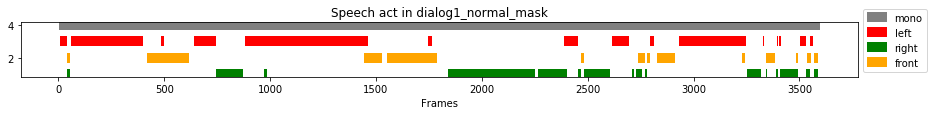

Nb of sound changes: 0
Nb of speech act of actor on left: 15
Nb of speech act of actor on front: 13
Nb of speech act of actor on right: 16
Total nb of speech act: 44


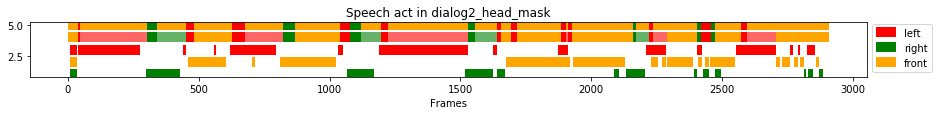

Nb of sound changes: 36
Nb of speech act of actor on left: 15
Nb of speech act of actor on front: 17
Nb of speech act of actor on right: 13
Total nb of speech act: 45


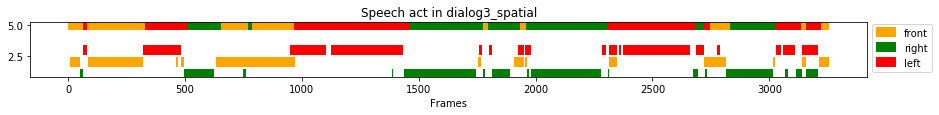

Nb of sound changes: 23
Nb of speech act of actor on left: 19
Nb of speech act of actor on front: 14
Nb of speech act of actor on right: 18
Total nb of speech act: 51


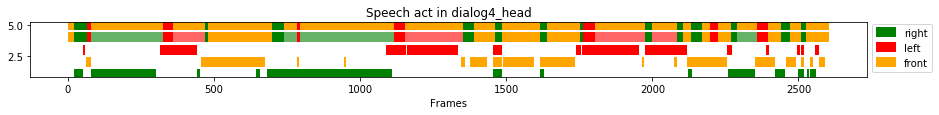

Nb of sound changes: 39
Nb of speech act of actor on left: 13
Nb of speech act of actor on front: 17
Nb of speech act of actor on right: 13
Total nb of speech act: 43


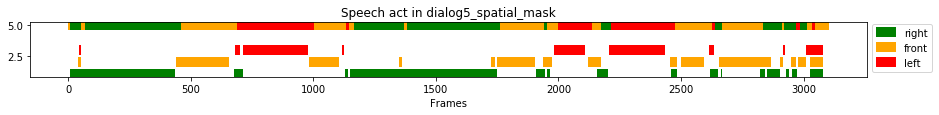

Nb of sound changes: 31
Nb of speech act of actor on left: 10
Nb of speech act of actor on front: 15
Nb of speech act of actor on right: 17
Total nb of speech act: 42


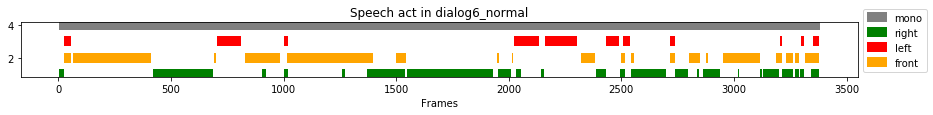

Nb of sound changes: 0
Nb of speech act of actor on left: 11
Nb of speech act of actor on front: 19
Nb of speech act of actor on right: 24
Total nb of speech act: 54


In [78]:
color_direction = ['r','orange','g','grey'] #left, front, right, none, peudo-left, peudo-right,
nb_speech_acts = {}
for i in range(0,6):
    plt.figure(figsize=(15,1))
    plt.title('Speech act in '+dialog_durations.keys().values[i])
    df = dfs_speaker_event[i] 
    last_frame = int(dialog_durations.iloc[:, [i]].values[0]/40)
    
    sound_df = dfs_event[i]
    sound_df_new = dfs_event_new[i]
    sound_dir = sound_df[sound_df['event'].str.contains('sound')][["frame_number","event"]].values
    sound_dir_new = sound_df_new[sound_df_new['event'].str.contains('sound')][["frame_number","event"]].values
   
    count_left = 0
    count_front = 0
    count_right = 0
    count_sound_changes = 0
    
    #plot sound direction - come from event_timestamp_dialogx (this is the binaural audio)
    if sound_dir[0][1] == 'no_sound_direction':
        y = 4
        plt.hlines(y,1,last_frame, colors=color_direction[3], linewidth=10, label='mono')
    else:
        for j in range(0,len(sound_dir)):
            direction = sound_dir[j][1]
            sound_start = sound_dir[j][0]
            
            if j < len(sound_dir)-1:
                next_sound_start = sound_dir[j+1][0]
            else:
                next_sound_start = last_frame
                
            if direction == 'sound_left':
                count_sound_changes += 1
                y = 5
                plt.hlines(y,sound_start,next_sound_start, colors=color_direction[0], linewidth=10)
            elif direction == 'sound_front':
                count_sound_changes += 1
                y = 5
                plt.hlines(y,sound_start,next_sound_start, colors=color_direction[1], linewidth=10)
            else:
                count_sound_changes += 1
                y = 5
                plt.hlines(y,sound_start,next_sound_start, colors=color_direction[2], linewidth=10)
    
    if i==1 or i==3: # dialog 2 and 4: head rotation condition:
        for j in range(0,len(sound_dir_new)):
            direction_new = sound_dir_new[j][1]
            sound_start_new = sound_dir_new[j][0]
            
            if j < len(sound_dir_new)-1:
                next_sound_start_new = sound_dir_new[j+1][0]
            else:
                next_sound_start_new = last_frame
                
            if direction_new == 'sound_left':
                y = 4
                plt.hlines(y,sound_start_new,next_sound_start_new, colors=color_direction[0], linewidth=10)
            elif direction_new == 'sound_right':
                y = 4
                plt.hlines(y,sound_start_new,next_sound_start_new, colors=color_direction[2], linewidth=10)
            elif direction_new == 'sound_peudo_front_l':
                y = 4
                plt.hlines(y,sound_start_new,next_sound_start_new, colors=color_direction[0], linewidth=10, alpha = 0.6)
            elif direction_new == 'sound_peudo_front_r':
                y = 4
                plt.hlines(y,sound_start_new,next_sound_start_new, colors=color_direction[2], linewidth=10, alpha = 0.6)
            else:
                y = 4
                plt.hlines(y,sound_start_new,next_sound_start_new, colors=color_direction[1], linewidth=10)
                
    
    #plot act of speech (come from dialogx_speaker_events, this is the real act dfs_speaker_event)
    for j in range(0,len(df)):
        speaker = df.loc[(df.index == j), "speaker"].values[0]
        x_start = df.loc[(df.index == j), "frame_start"].values[0]
        x_end = df.loc[(df.index == j), "frame_end"].values[0]
        event = df.loc[(df.index == j), "event"].values[0]
        if speaker == 'speaker_left':
            count_left += 1
            y = 3
            plt.hlines(y,x_start,x_end, colors=color_direction[0], linewidth=10, label='left')
            #plt.text(y, x_start+(x_end-x_start)/2, event)
        elif speaker == 'speaker_front':
            count_front += 1
            y = 2
            plt.hlines(y,x_start,x_end, colors=color_direction[1], linewidth=10, label='front')
            #plt.text(y, x_start+(x_end-x_start)/2, event)
        else:
            count_right += 1
            y = 1
            plt.hlines(y,x_start,x_end, colors=color_direction[2], linewidth=10, label='right')
            #plt.text(y, x_start+(x_end-x_start)/2, event)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(),loc='lower left', bbox_to_anchor=(1, 0))
    plt.xlabel('Frames')
    #plt.savefig("speech_act_dialog"+str(i+1)+".pdf", bbox_inches='tight')
    plt.show()
    print('Nb of sound changes: '+str(count_sound_changes))
    print('Nb of speech act of actor on left: '+str(count_left))
    print('Nb of speech act of actor on front: '+str(count_front))
    print('Nb of speech act of actor on right: '+str(count_right))
    print('Total nb of speech act: '+str(count_right+count_left+count_front))
    nb_speech_acts[i] = count_right+count_left+count_front

In [81]:
sound_direction_per_frame = [None] * 6
speech_act_per_frame = [None] * 6
sound_direction_per_frame_adjusted = [None] * 6


for i in range(0,6):
    speech_act_per_frame[i] = [None] * frame_length[i] # initialize as all silient: None
    sound_direction_per_frame[i] = [None] * frame_length[i]
    sound_direction_per_frame_adjusted[i] = [None] * frame_length[i]

    df = dfs_speaker_event[i] 
    last_frame = int(dialog_durations.iloc[:, [i]].values[0]/40)
    sound_df = dfs_event[i]
    sound_dir = sound_df[sound_df['event'].str.contains('sound')][["frame_number","event"]].values
    
    sound_df_adjusted = dfs_event_new[i]
    sound_dir_adjusted = sound_df_adjusted[sound_df_adjusted['event'].str.contains('sound')][["frame_number","event"]].values
    
    
    #sound direction - come from event_timestamp_dialogx (this is the binaural audio)
    if sound_dir[0][1] == 'no_sound_direction': # mono, no sound direction
        for k in range(0, frame_length[i]):
            sound_direction_per_frame[i][k] = 0
    else:
        for j in range(0,len(sound_dir)):
            direction = sound_dir[j][1]
            sound_start = sound_dir[j][0]
            
            if j < len(sound_dir)-1:
                next_sound_start = sound_dir[j+1][0]
            else:
                next_sound_start = last_frame
                
            if direction == 'sound_left':
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame[i][k] = 1 # left
            elif direction == 'sound_front':
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame[i][k] = 3 # front
            else:
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame[i][k] = 2 # right
    
    
    #sound direction (adjusted with pseudo direction) - come from event_timestamp_dialogx (this is the binaural audio)
    if i==1 or i==3: # dialog 2 and 4: head rotation condition:
        for j in range(0,len(sound_dir_adjusted)):
            direction = sound_dir_adjusted[j][1]
            sound_start = sound_dir_adjusted[j][0]

            if j < len(sound_dir_adjusted)-1:
                next_sound_start = sound_dir_adjusted[j+1][0]
            else:
                next_sound_start = last_frame

            if direction == 'sound_left':
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame_adjusted[i][k] = 1 # left
            elif direction == 'sound_right':
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame_adjusted[i][k] = 2 # right
            elif direction == 'sound_peudo_front_l':
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame_adjusted[i][k] = 1 # left
            elif direction == 'sound_peudo_front_r':
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame_adjusted[i][k] = 2 # right
            else:
                for k in range(sound_start, next_sound_start):
                    sound_direction_per_frame_adjusted[i][k] = 3 # front
    
    #act of speech (come from dialogx_speaker_events, this is the real act dfs_speaker_event)
    for j in range(0,len(df)):
        speaker = df.loc[(df.index == j), "speaker"].values[0]
        x_start = df.loc[(df.index == j), "frame_start"].values[0]
        x_end = df.loc[(df.index == j), "frame_end"].values[0]
        event = df.loc[(df.index == j), "event"].values[0]
        
        print("speaker: " + str(speaker) + " frame start: " + str(x_start) + " frame end: " + str(x_end) + " event: " + str(event))
        
        if speaker == 'speaker_left':
            for k in range(x_start, x_end+1):
                if speech_act_per_frame[i][k] == None:
                    speech_act_per_frame[i][k] = [1] # left
                else:
                    speech_act_per_frame[i][k].append(1) # 2nd speaker: left
        elif speaker == 'speaker_front':
            for k in range(x_start, x_end+1):
                if speech_act_per_frame[i][k] == None:
                    speech_act_per_frame[i][k] = [3] # front
                else:
                    speech_act_per_frame[i][k].append(3) # 2nd speaker: front
        elif speaker == 'speaker_right':
            for k in range(x_start, x_end+1):
                if speech_act_per_frame[i][k] == None:
                    speech_act_per_frame[i][k] = [2] # right
                else:
                    speech_act_per_frame[i][k].append(2) # 2nd speaker: right
        else:
            print('error in tracking the speaker')
    

speaker: speaker_left frame start: 7 frame end: 39 event: greetings
speaker: speaker_right frame start: 39 frame end: 57 event: greetings
speaker: speaker_front frame start: 39 frame end: 57 event: greetings
speaker: speaker_left frame start: 58 frame end: 400 event: intro_proposal
speaker: speaker_front frame start: 417 frame end: 615 event: obj_proposal
speaker: speaker_left frame start: 485 frame end: 500 event: interjection
speaker: speaker_left frame start: 640 frame end: 745 event: answer
speaker: speaker_right frame start: 745 frame end: 870 event: need_info
speaker: speaker_left frame start: 880 frame end: 1460 event: share_info
speaker: speaker_right frame start: 973 frame end: 983 event: interjection
speaker: speaker_front frame start: 1442 frame end: 1530 event: interuption
speaker: speaker_front frame start: 1554 frame end: 1789 event: share_info
speaker: speaker_left frame start: 1745 frame end: 1765 event: interjection
speaker: speaker_right frame start: 1841 frame end: 2

speaker: speaker_right frame start: 2738 frame end: 2797 event: discuss_open_question
speaker: speaker_front frame start: 2801 frame end: 2851 event: discuss_open_question
speaker: speaker_right frame start: 2838 frame end: 2845 event: interjection
speaker: speaker_right frame start: 2861 frame end: 2937 event: conclusion
speaker: speaker_front frame start: 2874 frame end: 2883 event: interjection
speaker: speaker_front frame start: 2953 frame end: 3114 event: conclusion
speaker: speaker_right frame start: 3017 frame end: 3024 event: interjection
speaker: speaker_right frame start: 3114 frame end: 3125 event: interjection
speaker: speaker_right frame start: 3128 frame end: 3200 event: conclusion
speaker: speaker_front frame start: 3186 frame end: 3214 event: conclusion
speaker: speaker_left frame start: 3205 frame end: 3212 event: interjection
speaker: speaker_right frame start: 3214 frame end: 3260 event: conclusion
speaker: speaker_front frame start: 3230 frame end: 3260 event: concl

In [82]:
speech_act_per_frame[0][38:57]

[[1],
 [1, 2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3],
 [2, 3]]

In [83]:
%store speech_act_per_frame

Stored 'speech_act_per_frame' (list)


In [71]:
%store -r speech_act_per_frame

In [84]:
%store sound_direction_per_frame

Stored 'sound_direction_per_frame' (list)


In [79]:
%store -r sound_direction_per_frame

In [85]:
%store sound_direction_per_frame_adjusted

Stored 'sound_direction_per_frame_adjusted' (list)


In [ ]:
%store -r sound_direction_per_frame_adjusted

#### Generate scanpath per participant per frame

In [244]:
L= [(125,313),(477,681)]
R= [(906,303),(1226,683)]
F= [(559,179),(830,444)]

L_rect = [L[0][0], L[0][1], L[1][0], L[1][1]]
R_rect = [R[0][0], R[0][1], R[1][0], R[1][1]]
F_rect = [F[0][0], F[0][1], F[1][0], F[1][1]]

For fixation points per participant, the participants are ordered in the following order based on fixations_original_all.tester_id.unique()

In [245]:
def pointInRect(point,rect):
    x1, y1, x2, y2 = rect
    x, y = point
    if (x1 <= x and x <= x2):
        if (y1 <= y and y <= y2):
            return True
    return False

Create observerble for HMM using eye tracking data and log of speaker in the dialogs

- aoi_per_participant_per_frame: AOI of eye tracking data
- aoi_obs_per_participant_per_frame_s: matching status of eye tracking data and speaker (as observerble)

In [341]:
aoi_per_participant_per_frame = [None] * 6 # 6 dialogs

for dialog_nb, dialog in enumerate(fixation_points_per_participant_per_frame): # loop through dialogs
    aoi_per_participant = [None] * 42 # 42 participants
    
    for i in PID_eyetracking: # loop through participants -> sequence of tester_id
        participant = dialog[i]
        
        aoi_list_participant = [None] * frame_length[dialog_nb]
        
        for frame_nb in range(0, frame_length[dialog_nb]):
            if participant[frame_nb] != []:
                # use the first fixation point in this frame only; some participants may have multiple points which increase the overall AOI ratio
                point = (participant[frame_nb][0][0], participant[frame_nb][0][1]) # fixation
                           
                if pointInRect(point, L_rect):
                    aoi_list_participant[frame_nb] = 1 # Left
                elif pointInRect(point, R_rect):
                    aoi_list_participant[frame_nb] = 2  # Right
                elif pointInRect(point, F_rect):
                    aoi_list_participant[frame_nb] = 3  # Front
                else:
                    aoi_list_participant[frame_nb] = 4  # exterior
            else: # empty frame
                aoi_list_participant[frame_nb] = 5 # no fixation               
        aoi_per_participant[i] = aoi_list_participant     
    aoi_per_participant_per_frame[dialog_nb] = aoi_per_participant


In [342]:
%store aoi_per_participant_per_frame

Stored 'aoi_per_participant_per_frame' (list)


In [86]:
%store -r aoi_per_participant_per_frame

#### Generate observable per participant per frame

- S (1): Same ROI of the speaker when one speaker is speaking (for binaural/head + Same ROI of manipulated sound direction)
- D (2): ROI of a different speaker when one or multiple speaker(s) is speaking (for head/need to find a way to ignore the turning to front in the log <- not done)
- B (3): ROI of any of the speaker when multiple speaker is speaking
- E (4): ROI on Exterior 
- N (5): No fixations or all speakers are silent 

##### Observable based on speech act

In [344]:
observable_speech_act = [None] * 6 # construct observable based on speech acts (all dialogs)

for dialog_nb in range(0,6): # loop through dialogs
    observable_speech_act_per_participant = [None] * 42 # 42 participants
    
    for pid in range(0,42): # loop through participants
        observable_speech_act_list_participant = [None] * frame_length[dialog_nb]
        
        for frame_nb in range(0, frame_length[dialog_nb]):# loop through frames
            current_aoi = aoi_per_participant_per_frame[dialog_nb][pid][frame_nb]
            if current_aoi == 5:
                observable_speech_act_list_participant[frame_nb] = 5 # observable value N
            elif current_aoi == 4:
                observable_speech_act_list_participant[frame_nb] = 4 # observable value E 
            else: # fixation on certain speakers
                if speech_act_per_frame[dialog_nb][frame_nb] == None: # silent moment
                    observable_speech_act_list_participant[frame_nb] = 5 # observable value N
                elif len(speech_act_per_frame[dialog_nb][frame_nb]) == 1: # one speaker is talking 
                    if(current_aoi == speech_act_per_frame[dialog_nb][frame_nb][0]):
#                         print("[S] " + "current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb][0])) 
                        observable_speech_act_list_participant[frame_nb] = 1 # observable value S
                    else:
#                         print("[D] " + "current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb][0])) 
                        observable_speech_act_list_participant[frame_nb] = 2 # observable value D
                elif len(speech_act_per_frame[dialog_nb][frame_nb]) > 1: # more than one speakers are talking
                    if(current_aoi in speech_act_per_frame[dialog_nb][frame_nb]):
                        observable_speech_act_list_participant[frame_nb] = 3 # observable value B
                    else:
                        observable_speech_act_list_participant[frame_nb] = 2 # observable value D
                else:
                    print("cannot define observable value")
        observable_speech_act_per_participant[pid] = observable_speech_act_list_participant
    observable_speech_act[dialog_nb] = observable_speech_act_per_participant
                 

In [345]:
%store observable_speech_act

Stored 'observable_speech_act' (list)


In [87]:
%store -r observable_speech_act

In [153]:
df_dist[0:3]['count'].sum()

40512

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7

   count Observable  perc_F  perc_O
1  25071          S   0.567   0.166
2  13045          D   0.295   0.086
3   1699          B   0.038   0.011
4  33699          E   0.030   0.223
5  77476          N   0.070   0.513
1.0
0.999
   count Observable  perc_F  perc_O
1  20975          S   0.497   0.172
2  14542          D   0.345   0.119
3   2442          B   0.058   0.020
4  22445          E   0.027   0.184
5  61816          N   0.073   0.506
1.0
1.001
   count Observable  perc_F  perc_O
1  29976          S   0.636   0.219
2   9944          D   0.211   0.073
3   2530          B   0.054   0.019
4  26801          E   0.028   0.196
5  67501          N   0.072   0.494
1.0010000000000001
1.001
   count Observable  perc_F  perc_O
1  26136          S   0.629   0.239
2   8970          D   0.216   0.082
3   2310          B   0.056   0.021
4  17201          E   0.024   0.157
5  54793          N   0.076   0.501
1.0010000000000001
1.0
   count Observable  perc_F  perc_O
1  27157          S   0.631   0.

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


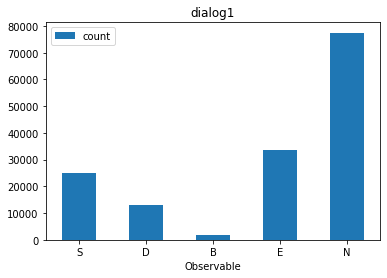

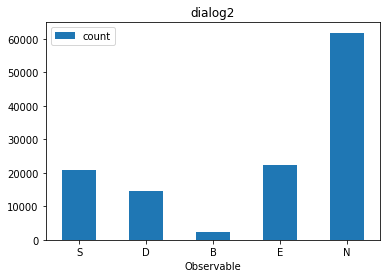

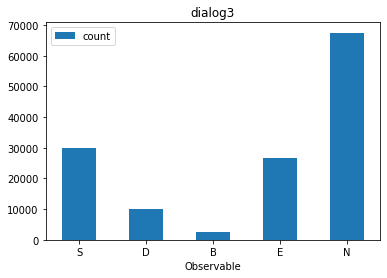

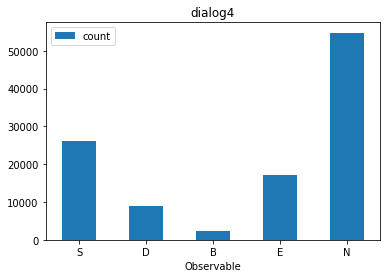

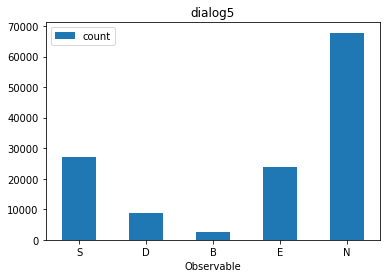

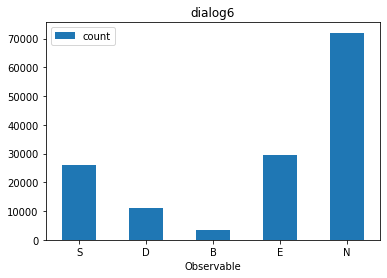

In [168]:
for dialog_nb in range(0,6): # loop through dialogs 
    df_dist = pd.DataFrame(0, index=[1,2,3,4,5], columns = ['count'])
    df_dist['Observable'] = ['S', 'D', 'B', 'E', 'N']
    for pid in range(0,42): # loop through participants
        a = np.array(np.unique(np.asarray(observable_speech_act[dialog_nb][pid]), return_counts=True)).T
        for a_i in a:
            df_dist['count'][a_i[0]] = df_dist['count'][a_i[0]] + a_i[1]
    df_dist.plot.bar(x='Observable', y='count', rot=0)
    plt.title("dialog" + str(dialog_nb+1))
    
    df_dist.loc[df_dist['Observable'] == 'S', 'perc_F'] = round(0.9 * df_dist.loc[df_dist['Observable'] == 'S', 'count']/df_dist[0:3]['count'].sum(),3) 
    df_dist.loc[df_dist['Observable'] == 'D', 'perc_F'] = round(0.9 * df_dist.loc[df_dist['Observable'] == 'D', 'count']/df_dist[0:3]['count'].sum(),3)
    df_dist.loc[df_dist['Observable'] == 'B', 'perc_F'] = round(0.9 * df_dist.loc[df_dist['Observable'] == 'B', 'count']/df_dist[0:3]['count'].sum(),3)
    df_dist.loc[df_dist['Observable'] == 'E', 'perc_F'] = round(0.1 * df_dist.loc[df_dist['Observable'] == 'E', 'count']/df_dist[3:5]['count'].sum(),3)
    df_dist.loc[df_dist['Observable'] == 'N', 'perc_F'] = round(0.1 * df_dist.loc[df_dist['Observable'] == 'N', 'count']/df_dist[3:5]['count'].sum(),3)
    
    df_dist['perc_O'] = round(df_dist['count']/df_dist['count'].sum(),3) 
    print(df_dist)
    print(df_dist.perc_F.sum())
    print(df_dist.perc_O.sum())
   

Double check on the stats

In [269]:
aoi_per_frame = pd.read_pickle(r'aoi_per_frame.pkl')

In [335]:
import operator

aoi_ratios_per_frame = {}
for dialog in aoi_per_frame:
    aoi_ratios_per_frame[dialog] = {}
    for frame in aoi_per_frame[dialog]:
        aoi_ratios_per_frame[dialog][frame] = {}
        length = len(aoi_per_frame[dialog][frame])
        if length > 0 :
            aoi_ratios_per_frame[dialog][frame]['L'] = aoi_per_frame[dialog][frame].count('L')/length
            aoi_ratios_per_frame[dialog][frame]['R'] = aoi_per_frame[dialog][frame].count('R')/length
            aoi_ratios_per_frame[dialog][frame]['F'] = aoi_per_frame[dialog][frame].count('F')/length
            aoi_ratios_per_frame[dialog][frame]['e'] = aoi_per_frame[dialog][frame].count('e')/length
            # find the most frequent area
            dict_temp = dict((k, aoi_ratios_per_frame[dialog][frame][k]) for k in ('L', 'R', 'F', 'e'))
            dict_temp_note_e = dict((k, aoi_ratios_per_frame[dialog][frame][k]) for k in ('L', 'R', 'F'))
            
            aoi_ratios_per_frame[dialog][frame]['aoi_most'] = max(dict_temp.items(), key=operator.itemgetter(1))[0]
            aoi_ratios_per_frame[dialog][frame]['aoi_most_not_e'] = max(dict_temp_note_e.items(), key=operator.itemgetter(1))[0]
        else:
            aoi_ratios_per_frame[dialog][frame]['L'] = 0
            aoi_ratios_per_frame[dialog][frame]['R'] = 0
            aoi_ratios_per_frame[dialog][frame]['F'] = 0
            aoi_ratios_per_frame[dialog][frame]['e'] = 0

# include exterior (e)
num_scanpaths_aoi = {}
num_scanpaths_aoi_perc = {}
for dialog in aoi_ratios_per_frame:
    num_scanpaths_aoi[dialog] = {}
    num_path_aoi = []
    
    num_scanpaths_aoi_perc[dialog] = {}
    num_path_aoi_perc = []
    for frame in aoi_ratios_per_frame[dialog]:
        try:
            aoi_most_temp = str(aoi_ratios_per_frame[dialog][frame]['aoi_most'])
    #         print(aoi_most_temp)
    #         print('\n')
            if aoi_most_temp == 'e': 
                num_path_aoi.append(4)
            elif aoi_most_temp == 'R':
                num_path_aoi.append(2)
            elif aoi_most_temp == 'F':
                num_path_aoi.append(3)
            else: # 'L'
                num_path_aoi.append(1)
            num_path_aoi_perc.append(aoi_ratios_per_frame[dialog][frame][aoi_most_temp])
        except:
            num_path_aoi.append(None) # no AOI in this frame
            num_path_aoi_perc.append(None)
            print('dialog: ' + dialog + ' frame:' + str(frame))
            
    num_scanpaths_aoi[dialog] = num_path_aoi
    num_scanpaths_aoi_perc[dialog] = num_path_aoi_perc

dialog: dialog1_normal_mask frame:3594
dialog: dialog4_head frame:2599
dialog: dialog4_head frame:2600
dialog: dialog4_head frame:2601
dialog: dialog4_head frame:2602
dialog: dialog4_head frame:2603
dialog: dialog4_head frame:2604
dialog: dialog6_normal frame:3379


In [336]:
num_scanpaths_aoi_perc['dialog1_normal_mask'][0] 

0.5714285714285714

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Application

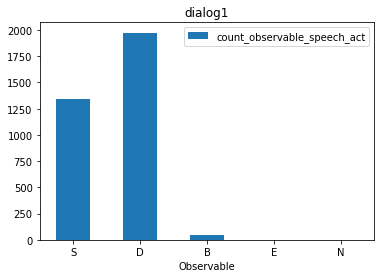

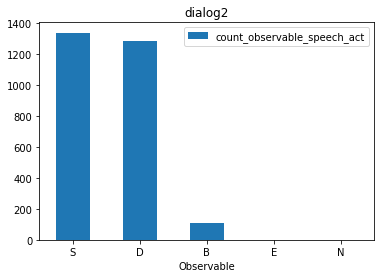

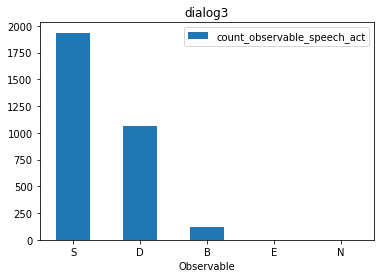

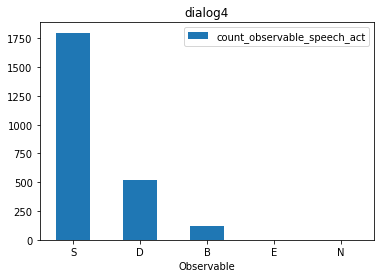

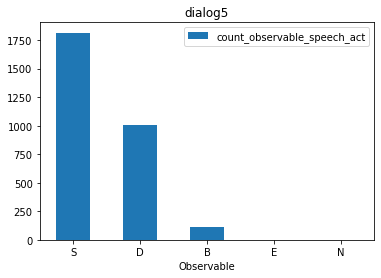

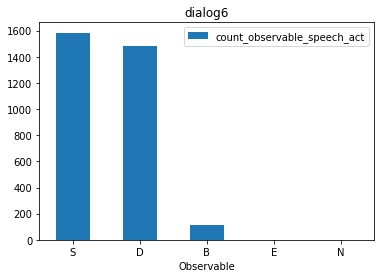

In [337]:
for dialog_nb in range(0,6):
    df_dist_c = pd.DataFrame(0, index=[1,2,3,4,5], columns = ['count_observable_speech_act'])
    df_dist_c['Observable'] = ['S', 'D', 'B', 'E', 'N']
    
    for frame_nb in range(0, frame_length[dialog_nb]):
        if speech_act_per_frame[dialog_nb][frame_nb] != None:
#             print(dialog_name[dialog_nb])
            current_aoi = num_scanpaths_aoi[dialog_name[dialog_nb]][frame_nb]
            if len(speech_act_per_frame[dialog_nb][frame_nb]) == 1: # one speaker is talking 
                if(current_aoi == speech_act_per_frame[dialog_nb][frame_nb][0]):
                    df_dist_c['count_observable_speech_act'][1] = df_dist_c['count_observable_speech_act'][1] + 1
#                     print("S" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
                else:
                    df_dist_c['count_observable_speech_act'][2] = df_dist_c['count_observable_speech_act'][2] + 1
#                     print("D" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
            elif len(speech_act_per_frame[dialog_nb][frame_nb]) > 1: # more than one speakers are talking
                if(current_aoi in speech_act_per_frame[dialog_nb][frame_nb]):
                    df_dist_c['count_observable_speech_act'][3] = df_dist_c['count_observable_speech_act'][3] + 1
#                     print("B" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
                else:
                    df_dist_c['count_observable_speech_act'][2] = df_dist_c['count_observable_speech_act'][2] + 1
            else:
                print("not in above cases")
    
#     print(df_dist_c)
        
    df_dist_c.plot.bar(x='Observable', y='count_observable_speech_act', rot=0)
    plt.title("dialog" + str(dialog_nb+1))

weighted count

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Applications/anaconda3/lib

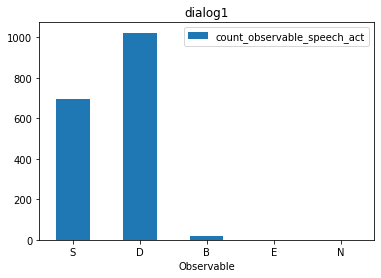

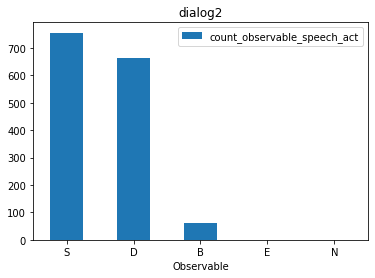

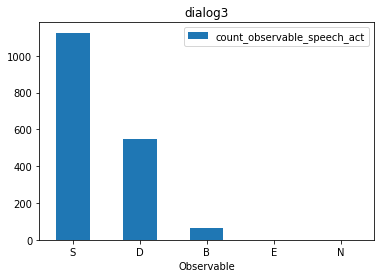

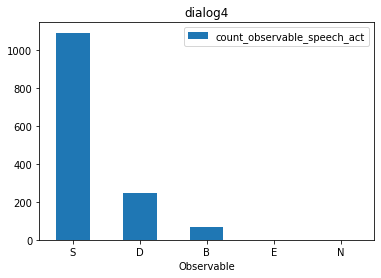

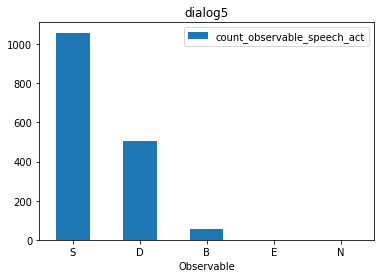

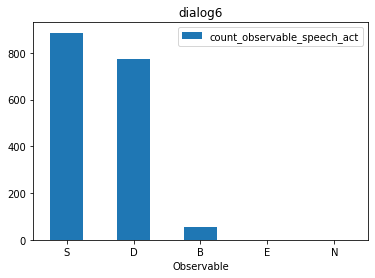

In [340]:
for dialog_nb in range(0,6):
    df_dist_c = pd.DataFrame(0.0, index=[1,2,3,4,5], columns = ['count_observable_speech_act'])
    df_dist_c['Observable'] = ['S', 'D', 'B', 'E', 'N']
    
    for frame_nb in range(0, frame_length[dialog_nb]):
        if speech_act_per_frame[dialog_nb][frame_nb] != None and num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb] != None:

            current_aoi = num_scanpaths_aoi[dialog_name[dialog_nb]][frame_nb]
#             print(num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb])
#             print("dialog: " + str(dialog_nb + 1) + " frame: " + str(frame_nb))
            if len(speech_act_per_frame[dialog_nb][frame_nb]) == 1: # one speaker is talking 
                if(current_aoi == speech_act_per_frame[dialog_nb][frame_nb][0]):
                    df_dist_c['count_observable_speech_act'][1] = df_dist_c['count_observable_speech_act'][1] + num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb] 
#                     print("[S]" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
                else:
                    df_dist_c['count_observable_speech_act'][2] = df_dist_c['count_observable_speech_act'][2] + num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb] 
#                     print("[D]" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
            elif len(speech_act_per_frame[dialog_nb][frame_nb]) > 1: # more than one speakers are talking
                if(current_aoi in speech_act_per_frame[dialog_nb][frame_nb]):
                    df_dist_c['count_observable_speech_act'][3] = df_dist_c['count_observable_speech_act'][3] + num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb] 
#                     print("[B]" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
                else:
                    df_dist_c['count_observable_speech_act'][2] = df_dist_c['count_observable_speech_act'][2] + num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb] 
#                     print("[D]" + " current aoi: " + str(current_aoi) + " speech_act: " + str(speech_act_per_frame[dialog_nb][frame_nb])) 
            else:
                print("not in above cases")
            
#             print(num_scanpaths_aoi_perc[dialog_name[dialog_nb]][frame_nb] )
        
    df_dist_c.plot.bar(x='Observable', y='count_observable_speech_act', rot=0)
    plt.title("dialog" + str(dialog_nb+1))

##### Observable based on sound direction (without pseudo- adjustment for dialog 2 and 4)

In [348]:
observable_sound_dir = [None] * 6 # construct observable based on speech acts (all dialogs)

for dialog_nb in range(1,5): # loop through binaural/head dialogs: 2,3,4,5
    observable_sound_dir_per_participant = [None] * 42 # 42 participants
    
    for pid in range(0,42): # loop through participants
        observable_sound_dir_list_participant = [None] * frame_length[dialog_nb]
        
        for frame_nb in range(0, frame_length[dialog_nb]):# loop through frames
            current_aoi = aoi_per_participant_per_frame[dialog_nb][pid][frame_nb]
            if current_aoi == 5:
                observable_sound_dir_list_participant[frame_nb] = 5 # observable value N
            elif current_aoi == 4:
                observable_sound_dir_list_participant[frame_nb] = 4 # observable value E 
            else: # fixation on certain speakers
                if(current_aoi == sound_direction_per_frame[dialog_nb][frame_nb]):
                    observable_sound_dir_list_participant[frame_nb] = 1 # observable value S
                else:
                    observable_sound_dir_list_participant[frame_nb] = 2 # observable value D
                
                # no observable value B as there is one main direction of sound
                
        observable_sound_dir_per_participant[pid] = observable_sound_dir_list_participant
    observable_sound_dir[dialog_nb] = observable_sound_dir_per_participant

In [349]:
%store observable_sound_dir

Stored 'observable_sound_dir' (list)


In [88]:
%store -r observable_sound_dir

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


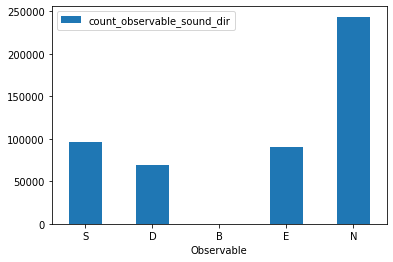

In [95]:
# df_dist = pd.DataFrame(0, index=[0], columns = ['S','D','B','E','N'])
df_dist = pd.DataFrame(0, index=[1,2,3,4,5], columns = ['count_observable_sound_dir'])
df_dist['Observable'] = ['S', 'D', 'B', 'E', 'N']

for dialog_nb in range(1,5): # loop through dialogs   
    for pid in range(0,42): # loop through participants
        a = np.array(np.unique(np.asarray(observable_sound_dir[dialog_nb][pid]), return_counts=True)).T
        for a_i in a:
            df_dist['count_observable_sound_dir'][a_i[0]] = df_dist['count_observable_sound_dir'][a_i[0]] + a_i[1]
            
df_dist.plot.bar(x='Observable', y='count_observable_sound_dir', rot=0)            

##### Observable based on sound direction (with pseudo- adjustment for dialog 2 and 4)

In [103]:
observable_sound_dir_adjusted = [None] * 6 # construct observable based on speech acts (all dialogs)

for dialog_nb in range(0,6): # loop through binaural/head dialogs: 2,3,4,5
    observable_sound_dir_adjusted_per_participant = [None] * 42 # 42 participants
    
    for pid in range(0,42): # loop through participants
        observable_sound_dir_adjusted_list_participant = [None] * frame_length[dialog_nb]
        
        if dialog_nb==1 or dialog_nb==3:
            for frame_nb in range(0, frame_length[dialog_nb]):# loop through frames
                current_aoi = aoi_per_participant_per_frame[dialog_nb][pid][frame_nb]
                if current_aoi == 5:
                    observable_sound_dir_adjusted_list_participant[frame_nb] = 5 # observable value N
                elif current_aoi == 4:
                    observable_sound_dir_adjusted_list_participant[frame_nb] = 4 # observable value E 
                else: # fixation on certain speakers
                    if(current_aoi == sound_direction_per_frame_adjusted[dialog_nb][frame_nb]):
                        observable_sound_dir_adjusted_list_participant[frame_nb] = 1 # observable value S
                    else:
                        observable_sound_dir_adjusted_list_participant[frame_nb] = 2 # observable value D

                    # no observable value B as there is one main direction of sound
        elif dialog_nb==2 or dialog_nb==4:
            for frame_nb in range(0, frame_length[dialog_nb]):# loop through frames
                current_aoi = aoi_per_participant_per_frame[dialog_nb][pid][frame_nb]
                if current_aoi == 5:
                    observable_sound_dir_adjusted_list_participant[frame_nb] = 5 # observable value N
                elif current_aoi == 4:
                    observable_sound_dir_adjusted_list_participant[frame_nb] = 4 # observable value E 
                else: # fixation on certain speakers
                    if(current_aoi == sound_direction_per_frame[dialog_nb][frame_nb]):
                        observable_sound_dir_adjusted_list_participant[frame_nb] = 1 # observable value S
                    else:
                        observable_sound_dir_adjusted_list_participant[frame_nb] = 2 # observable value D
                    # no observable value B as there is one main direction of sound
        else: # dummy value
            for frame_nb in range(0, frame_length[dialog_nb]):# loop through frames
                observable_sound_dir_adjusted_list_participant[frame_nb] = 6 # observable value D
                
        observable_sound_dir_adjusted_per_participant[pid] = observable_sound_dir_adjusted_list_participant
    observable_sound_dir_adjusted[dialog_nb] = observable_sound_dir_adjusted_per_participant

In [104]:
%store observable_sound_dir_adjusted

Stored 'observable_sound_dir_adjusted' (list)


In [128]:
%store -r observable_sound_dir_adjusted

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


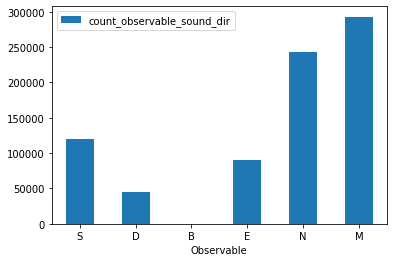

In [107]:
# df_dist = pd.DataFrame(0, index=[0], columns = ['S','D','B','E','N'])
df_dist = pd.DataFrame(0, index=[1,2,3,4,5,6], columns = ['count_observable_sound_dir'])
df_dist['Observable'] = ['S', 'D', 'B', 'E', 'N', 'M'] #M: dummy sound - mono

for dialog_nb in range(0,6): # loop through dialogs   
    for pid in range(0,42): # loop through participants
        a = np.array(np.unique(np.asarray(observable_sound_dir_adjusted[dialog_nb][pid]), return_counts=True)).T
        for a_i in a:
            df_dist['count_observable_sound_dir'][a_i[0]] = df_dist['count_observable_sound_dir'][a_i[0]] + a_i[1]
            
df_dist.plot.bar(x='Observable', y='count_observable_sound_dir', rot=0)            

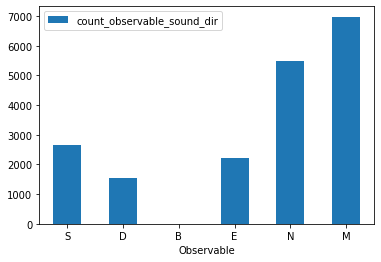

In [131]:
# df_dist = pd.DataFrame(0, index=[0], columns = ['S','D','B','E','N'])
df_dist = pd.DataFrame(0, index=[1,2,3,4,5,6], columns = ['count_observable_sound_dir'])
df_dist['Observable'] = ['S', 'D', 'B', 'E', 'N', 'M'] #M: dummy sound - mono

for dialog_nb in range(0,6): # loop through dialogs   
    for pid in range(1,2): # certain participants
        a = np.array(np.unique(np.asarray(observable_sound_dir_adjusted[dialog_nb][pid]), return_counts=True)).T
        for a_i in a:
            df_dist['count_observable_sound_dir'][a_i[0]] = df_dist['count_observable_sound_dir'][a_i[0]] + a_i[1]
            
df_dist.plot.bar(x='Observable', y='count_observable_sound_dir', rot=0)            

In [132]:
df_dist

,count_observable_sound_dir,Observable
1,2666,S
2,1529,D
3,0,B
4,2208,E
5,5472,N
6,6975,M


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7

    count Observable  perc_F  perc_O
1       0          S     NaN     0.0
2       0          D     NaN     0.0
3       0          B     NaN     0.0
4       0          E     NaN     0.0
5       0          N     NaN     0.0
6  150990          M     NaN     1.0
0.0
1.0
   count Observable  perc_F  perc_O
1  25335          S   0.564   0.207
2  15089          D   0.336   0.123
3      0          B     NaN   0.000
4  22445          E   0.027   0.184
5  59351          N   0.073   0.486
6      0          M     NaN   0.000
0.9999999999999999
1.0
   count Observable  perc_F  perc_O
1  34841          S   0.709   0.255
2   9399          D   0.191   0.069
3      0          B     NaN   0.000
4  26801          E   0.029   0.196
5  65711          N   0.071   0.481
6      0          M     NaN   0.000
0.9999999999999999
1.001
   count Observable  perc_F  perc_O
1  28532          S   0.651   0.261
2  10896          D   0.249   0.100
3      0          B     NaN   0.000
4  17201          E   0.025   0.157
5

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


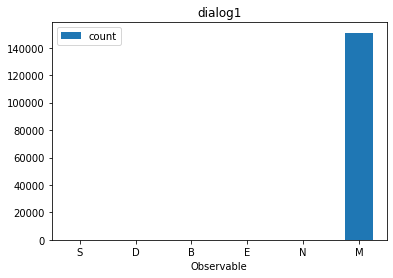

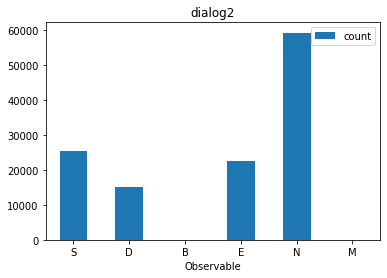

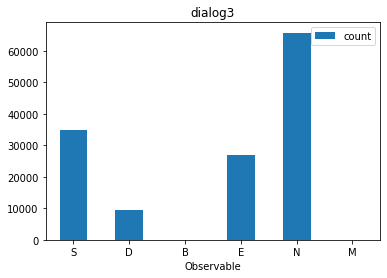

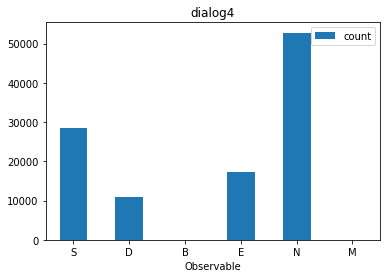

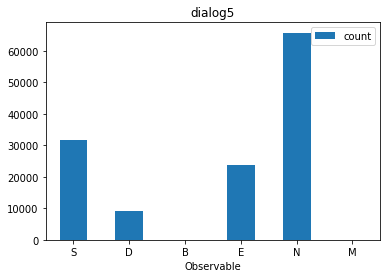

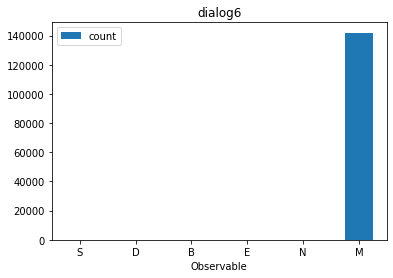

In [177]:
for dialog_nb in range(0,6): # loop through dialogs 
    df_dist = pd.DataFrame(0, index=[1,2,3,4,5,6], columns = ['count'])
    df_dist['Observable'] = ['S', 'D', 'B', 'E', 'N', 'M'] #M: dummy sound - mono
    for pid in range(0,42): # loop through participants
        a = np.array(np.unique(np.asarray(observable_sound_dir_adjusted[dialog_nb][pid]), return_counts=True)).T
        for a_i in a:
            df_dist['count'][a_i[0]] = df_dist['count'][a_i[0]] + a_i[1]
    df_dist.plot.bar(x='Observable', y='count', rot=0)
    plt.title("dialog" + str(dialog_nb+1))
    
    df_dist.loc[df_dist['Observable'] == 'S', 'perc_F'] = round(0.9 * df_dist.loc[df_dist['Observable'] == 'S', 'count']/df_dist[0:2]['count'].sum(),3) 
    df_dist.loc[df_dist['Observable'] == 'D', 'perc_F'] = round(0.9 * df_dist.loc[df_dist['Observable'] == 'D', 'count']/df_dist[0:2]['count'].sum(),3)
    df_dist.loc[df_dist['Observable'] == 'E', 'perc_F'] = round(0.1 * df_dist.loc[df_dist['Observable'] == 'E', 'count']/df_dist[3:5]['count'].sum(),3)
    df_dist.loc[df_dist['Observable'] == 'N', 'perc_F'] = round(0.1 * df_dist.loc[df_dist['Observable'] == 'N', 'count']/df_dist[3:5]['count'].sum(),3)
    
    df_dist['perc_O'] = round(df_dist['count']/df_dist['count'].sum(),3) 
                                                                
    print(df_dist)
    print(df_dist.perc_F.sum())
    print(df_dist.perc_O.sum())
   

##### Consolidate bbservable based on speech direction (with pseudo- adjustment for dialog 2 and 4) and speech act

In [126]:
# https://stackoverflow.com/questions/27929472/improve-row-append-performance-on-pandas-dataframes
consolidate_obs = [None] * 6
for dialog_nb in range(0,6): # loop through binaural/head dialogs: 2,3,4,5
    consolidate_obs[dialog_nb] = pd.DataFrame(columns = ['pid','frame_nb','o_sound','o_speech_act'])
    d = {}
    index_i = 0
    for pid in range(0,42): # loop through participants  
        for frame_nb in range(0, frame_length[dialog_nb]):
            d[index_i] = {'pid':pid, 'frame_nb':frame_nb, 'o_sound':observable_sound_dir_adjusted[dialog_nb][pid][frame_nb], 'o_speech_act':observable_speech_act[dialog_nb][pid][frame_nb]}
            index_i = index_i + 1
    consolidate_obs[dialog_nb] = pd.DataFrame.from_dict(d, "index")
    consolidate_obs[dialog_nb].to_csv("consolidate_obs_" + str(dialog_nb+1) +".csv")
    print("saved observables for dialog " + str(dialog_nb+1))

saved observables for dialog 1
saved observables for dialog 2
saved observables for dialog 3
saved observables for dialog 4
saved observables for dialog 5
saved observables for dialog 6


In [182]:
# to meet mHMM format
for dialog_nb in range(0,6): # loop through binaural/head dialogs: 2,3,4,5
    d = {}
    index_i = 0
    for pid in range(0,42): # loop through participants  
        consolidate_obs_temp = pd.DataFrame(columns = ['pid','frame_nb','o_sound','o_speech_act'])
        for frame_nb in range(0, frame_length[dialog_nb]):
            o_sound_num = observable_sound_dir_adjusted[dialog_nb][pid][frame_nb]
            o_speech_num = observable_speech_act[dialog_nb][pid][frame_nb]
            
            if o_sound_num == 1:
                o_sound = "S"
            elif o_sound_num == 2:
                o_sound = "D"
            elif o_sound_num == 4:
                o_sound = "E"
            elif o_sound_num == 5:
                o_sound = "N"
            else: #6
                o_sound = "M"
                
            if o_speech_num == 1:
                o_speech = "S"
            elif o_speech_num == 2:
                o_speech = "D"
            elif o_speech_num == 3:
                o_speech = "B"
            elif o_speech_num == 4:
                o_speech = "E"
            else: #5
                o_speech = "N"
            
            d[index_i] = {'pid':pid, 'frame_nb':frame_nb, 'o_sound':o_sound, 'o_speech_act':o_speech}
            index_i = index_i + 1
        consolidate_obs_temp = pd.DataFrame.from_dict(d, "index")
        consolidate_obs_temp.to_csv("hmm_observations/dialog" + str(dialog_nb+1) + "/obs_dialog" + str(dialog_nb+1) + "_p" + str(pid) +".csv",index=False)
    print("saved observables for dialog " + str(dialog_nb+1))

saved observables for dialog 1
saved observables for dialog 2
saved observables for dialog 3
saved observables for dialog 4
saved observables for dialog 5
saved observables for dialog 6


##### Continue with mHMM code in R (see mHMM.R and mHMM_mono.R)

Reference: https://cran.r-project.org/web/packages/mHMMbayes/vignettes/tutorial-mhmm.html

In [147]:
dialog2_states = pd.read_csv("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog1.csv")

In [148]:
dialog2_states.drop(columns=['Unnamed: 0'], inplace = True)

In [149]:
dialog2_states.tail()

,Subj_1,Subj_2,Subj_3,Subj_4,Subj_5,Subj_6,Subj_7,Subj_8,Subj_9,Subj_10,...,Subj_33,Subj_34,Subj_35,Subj_36,Subj_37,Subj_38,Subj_39,Subj_40,Subj_41,Subj_42
122215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
122216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
122217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
122218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
122219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [152]:
dialog2_states_res = {col:dialog2_states[col].value_counts() for col in dialog2_states.columns}

In [158]:
dialog2_states_res['Subj_3'].loc[1]

3090

In [162]:
sum_state2 = 0
sum_state1 = 0
for i in range(1,43):
    print ("Participant " + str(i) + " state 2 to state 1 ratio: " + str(dialog2_states_res['Subj_'+ str(i)].loc[2]/dialog2_states_res['Subj_'+ str(i)].loc[1]))
    
    sum_state2 = sum_state2 + dialog2_states_res['Subj_'+ str(i)].loc[2]
    sum_state1 = sum_state1 + dialog2_states_res['Subj_'+ str(i)].loc[1]
print("Average state ratio (state 2 to state 1): " + str(sum_state2/sum_state1))

Participant 1 state 2 to state 1 ratio: 4.480225988700565
Participant 2 state 2 to state 1 ratio: 2.0583289542827115
Participant 3 state 2 to state 1 ratio: 1.825242718446602
Participant 4 state 2 to state 1 ratio: 1.7094972067039107
Participant 5 state 2 to state 1 ratio: 1.507323798035499
Participant 6 state 2 to state 1 ratio: 1.564629847238543
Participant 7 state 2 to state 1 ratio: 1.6617012936103488
Participant 8 state 2 to state 1 ratio: 1.6602673980116558
Participant 9 state 2 to state 1 ratio: 1.8498367791077257
Participant 10 state 2 to state 1 ratio: 1.8156748911465892
Participant 11 state 2 to state 1 ratio: 1.904191616766467
Participant 12 state 2 to state 1 ratio: 1.9915188897455667
Participant 13 state 2 to state 1 ratio: 1.9834384858044165
Participant 14 state 2 to state 1 ratio: 1.8336927036238437
Participant 15 state 2 to state 1 ratio: 2.1207549867734325
Participant 16 state 2 to state 1 ratio: 2.0569233799487887
Participant 17 state 2 to state 1 ratio: 2.08474153519

Put into one

In [187]:
def check_state(filename, dialog_id, mask_, sound_):
    dialog_states = pd.read_csv(filename)
    dialog_states.drop(columns=['Unnamed: 0'], inplace = True)
    dialog_states_res = {col:dialog_states[col].value_counts() for col in dialog_states.columns}
    sum_state2 = 0
    sum_state1 = 0
    df = pd.DataFrame(columns=['PID', 'dialog_id', 'mask', 'sound','state1_to_2_ratio'])
    for i in range(1,43):
        ratio = dialog_states_res['Subj_'+ str(i)].loc[2]/dialog_states_res['Subj_'+ str(i)].loc[1]
        print ("Participant " + str(i) + " state 2 to state 1 ratio: " + str(ratio))

        sum_state2 = sum_state2 + dialog_states_res['Subj_'+ str(i)].loc[2]
        sum_state1 = sum_state1 + dialog_states_res['Subj_'+ str(i)].loc[1]
        df.loc[i-1] = [i] + [dialog_id] + [mask_] + [sound_] + [ratio]
    print("_______________________")
    print("Average state ratio (state 2 to state 1): " + str(sum_state2/sum_state1))
    return df
    

In [203]:
state_ratio_2 = check_state("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog2.csv", 2, "yes", "head")

Participant 1 state 2 to state 1 ratio: 4.480225988700565
Participant 2 state 2 to state 1 ratio: 2.0583289542827115
Participant 3 state 2 to state 1 ratio: 1.825242718446602
Participant 4 state 2 to state 1 ratio: 1.7094972067039107
Participant 5 state 2 to state 1 ratio: 1.507323798035499
Participant 6 state 2 to state 1 ratio: 1.564629847238543
Participant 7 state 2 to state 1 ratio: 1.6617012936103488
Participant 8 state 2 to state 1 ratio: 1.6602673980116558
Participant 9 state 2 to state 1 ratio: 1.8498367791077257
Participant 10 state 2 to state 1 ratio: 1.8156748911465892
Participant 11 state 2 to state 1 ratio: 1.904191616766467
Participant 12 state 2 to state 1 ratio: 1.9915188897455667
Participant 13 state 2 to state 1 ratio: 1.9834384858044165
Participant 14 state 2 to state 1 ratio: 1.8336927036238437
Participant 15 state 2 to state 1 ratio: 2.1207549867734325
Participant 16 state 2 to state 1 ratio: 2.0569233799487887
Participant 17 state 2 to state 1 ratio: 2.08474153519

In [202]:
state_ratio_2.head()

,PID,dialog_id,mask,sound,state1_to_2_ratio
0,1,2,yes,head,4.480226
1,2,2,yes,head,2.058329
2,3,2,yes,head,1.825243
3,4,2,yes,head,1.709497
4,5,2,yes,head,1.507324


In [201]:
state_ratio_3 = check_state("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog3.csv", 3, "no", "binaural")

Participant 1 state 2 to state 1 ratio: 6.537037037037037
Participant 2 state 2 to state 1 ratio: 5.371819960861057
Participant 3 state 2 to state 1 ratio: 4.923590054578533
Participant 4 state 2 to state 1 ratio: 3.4239130434782608
Participant 5 state 2 to state 1 ratio: 2.4072833821682713
Participant 6 state 2 to state 1 ratio: 2.421366024518389
Participant 7 state 2 to state 1 ratio: 2.3946976467083707
Participant 8 state 2 to state 1 ratio: 2.140583554376658
Participant 9 state 2 to state 1 ratio: 2.0363692881566675
Participant 10 state 2 to state 1 ratio: 1.924113156713067
Participant 11 state 2 to state 1 ratio: 1.8618457850579304
Participant 12 state 2 to state 1 ratio: 1.965841809625019
Participant 13 state 2 to state 1 ratio: 2.0320916905444126
Participant 14 state 2 to state 1 ratio: 1.9768170835238033
Participant 15 state 2 to state 1 ratio: 1.9528415961305925
Participant 16 state 2 to state 1 ratio: 2.043523982006193
Participant 17 state 2 to state 1 ratio: 2.05778367031267

In [200]:
state_ratio_4 = check_state("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog4.csv", 4, "no", "head")

Participant 1 state 2 to state 1 ratio: 3.277504105090312
Participant 2 state 2 to state 1 ratio: 2.5013440860215055
Participant 3 state 2 to state 1 ratio: 1.9468325791855203
Participant 4 state 2 to state 1 ratio: 1.5734749320819956
Participant 5 state 2 to state 1 ratio: 1.3890315480557593
Participant 6 state 2 to state 1 ratio: 1.4425691514299108
Participant 7 state 2 to state 1 ratio: 1.4417514729512586
Participant 8 state 2 to state 1 ratio: 1.5671347622567136
Participant 9 state 2 to state 1 ratio: 1.5783569778950841
Participant 10 state 2 to state 1 ratio: 1.5652387986213687
Participant 11 state 2 to state 1 ratio: 1.6424751014385834
Participant 12 state 2 to state 1 ratio: 1.755156002115283
Participant 13 state 2 to state 1 ratio: 1.7323705018557367
Participant 14 state 2 to state 1 ratio: 1.7048876362827263
Participant 15 state 2 to state 1 ratio: 1.6639623670575403
Participant 16 state 2 to state 1 ratio: 1.631977772164688
Participant 17 state 2 to state 1 ratio: 1.677286742

In [199]:
state_ratio_5 = check_state("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog5.csv", 5, "yes", "binaural")

Participant 1 state 2 to state 1 ratio: 3.753445635528331
Participant 2 state 2 to state 1 ratio: 2.1934156378600824
Participant 3 state 2 to state 1 ratio: 2.1102204408817635
Participant 4 state 2 to state 1 ratio: 1.8353505366522036
Participant 5 state 2 to state 1 ratio: 1.7376962427235845
Participant 6 state 2 to state 1 ratio: 1.935687263556116
Participant 7 state 2 to state 1 ratio: 2.0546885983410657
Participant 8 state 2 to state 1 ratio: 1.9846153846153847
Participant 9 state 2 to state 1 ratio: 1.9681257968550787
Participant 10 state 2 to state 1 ratio: 1.847967703459033
Participant 11 state 2 to state 1 ratio: 1.9916761587663192
Participant 12 state 2 to state 1 ratio: 1.909772674009843
Participant 13 state 2 to state 1 ratio: 1.9078331051379982
Participant 14 state 2 to state 1 ratio: 2.095597663484827
Participant 15 state 2 to state 1 ratio: 2.038371182458888
Participant 16 state 2 to state 1 ratio: 2.149071079830068
Participant 17 state 2 to state 1 ratio: 2.1953494005086

In [198]:
state_ratio_1 = check_state("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog1.csv", 1, "yes", "mono")

Participant 1 state 2 to state 1 ratio: 6.681623931623932
Participant 2 state 2 to state 1 ratio: 4.836038961038961
Participant 3 state 2 to state 1 ratio: 3.3752535496957403
Participant 4 state 2 to state 1 ratio: 3.364188163884674
Participant 5 state 2 to state 1 ratio: 2.930680078722939
Participant 6 state 2 to state 1 ratio: 3.39128664495114
Participant 7 state 2 to state 1 ratio: 3.300239234449761
Participant 8 state 2 to state 1 ratio: 3.228168185827698
Participant 9 state 2 to state 1 ratio: 3.2123421429501366
Participant 10 state 2 to state 1 ratio: 3.2721330956625074
Participant 11 state 2 to state 1 ratio: 3.0709285567222566
Participant 12 state 2 to state 1 ratio: 3.1705336426914155
Participant 13 state 2 to state 1 ratio: 3.4568949074957085
Participant 14 state 2 to state 1 ratio: 3.3035485250106884
Participant 15 state 2 to state 1 ratio: 3.2933917197452227
Participant 16 state 2 to state 1 ratio: 3.3157262905162064
Participant 17 state 2 to state 1 ratio: 3.31420302131865

In [197]:
state_ratio_6 = check_state("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/dialog6.csv", 6, "no", "mono")

Participant 1 state 2 to state 1 ratio: 6.4613686534216335
Participant 2 state 2 to state 1 ratio: 4.395051875498803
Participant 3 state 2 to state 1 ratio: 4.3679195341450505
Participant 4 state 2 to state 1 ratio: 3.135821352095442
Participant 5 state 2 to state 1 ratio: 2.729037952338923
Participant 6 state 2 to state 1 ratio: 2.8063063063063063
Participant 7 state 2 to state 1 ratio: 3.2653686677483322
Participant 8 state 2 to state 1 ratio: 2.9001875090148563
Participant 9 state 2 to state 1 ratio: 2.953730179360541
Participant 10 state 2 to state 1 ratio: 2.842655752614825
Participant 11 state 2 to state 1 ratio: 2.800470203414086
Participant 12 state 2 to state 1 ratio: 2.94015931610647
Participant 13 state 2 to state 1 ratio: 3.1688804554079697
Participant 14 state 2 to state 1 ratio: 3.041335724656247
Participant 15 state 2 to state 1 ratio: 3.135399673735726
Participant 16 state 2 to state 1 ratio: 3.079046613365515
Participant 17 state 2 to state 1 ratio: 3.093758905671131
P

In [208]:
states_all = state_ratio_1
states_all = states_all.append(state_ratio_2, ignore_index=True)
states_all = states_all.append(state_ratio_3, ignore_index=True)
states_all = states_all.append(state_ratio_4, ignore_index=True)
states_all = states_all.append(state_ratio_5, ignore_index=True)
states_all = states_all.append(state_ratio_6, ignore_index=True)

In [209]:
states_all.dialog_id.unique()

array([1, 2, 3, 4, 5, 6], dtype=object)

In [211]:
states_all.to_csv("/Users/zhongs/Desktop/Loic/Thesis_new/4_analysis/states/states_all.csv")